In [1]:
# this ipython magic command imports pylab and allows the plots to reside within the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The following examples are based on Florian Lhuillier's lecture on Matlab which can be found online:

http://geophysik.uni-muenchen.de/~lhuillier/teaching/AD2010/

# Pylab continued ...

## Examples based on  "... des données sous MATLAB"

In [2]:
set_printoptions(precision=2, suppress=True)

### Excercise 1

In [3]:
aa = loadtxt('dipole_ref.txt')

In [4]:
aa.shape

(21481, 3)

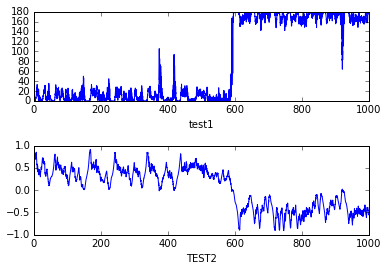

In [10]:
subplot(211)
plot(aa[:,0], aa[:,1])
xlabel("test1")
subplot(212)
plot(aa[:,0], aa[:,2])
xlabel('TEST2')
subplots_adjust(hspace=.5)

### Excercise 2

In [11]:
aa = loadtxt('dipole_ref.txt')

In [12]:
bb = loadtxt('dipole_pert.txt')

In [14]:
t = bb[:,0]; 

In [16]:
d = bb[:,2] - interp(t, aa[:,0],aa[:,2]);

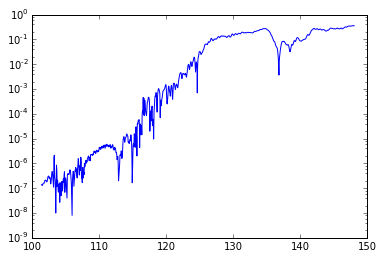

In [17]:
semilogy(t, abs(d))

### Excercise 3

In [18]:
d = genfromtxt('spectre.txt', skip_header=1, dtype=None, names=('name', 'number', 'amplitude'))

In [19]:
d

array([(b'a', 1, 9.5960921), (b'b', 2, 9.4450301), (b'c', 3, 7.5000147),
       (b'd', 4, 6.7446755), (b'e', 5, 4.7442346), (b'f', 6, 4.3416987),
       (b'g', 7, 2.9904522), (b'h', 8, 2.3769902), (b'i', 9, 1.8908512),
       (b'j', 10, 1.3387981), (b'k', 11, 1.0044059),
       (b'l', 12, 0.79748122), (b'm', 13, 0.5872564),
       (b'n', 14, 0.48502449), (b'p', 15, 0.34799267),
       (b'q', 16, 0.28167023), (b'r', 17, 0.20974501),
       (b's', 18, 0.16570928), (b't', 19, 0.12762576),
       (b'u', 20, 0.098378887)], 
      dtype=[('name', 'S1'), ('number', '<i8'), ('amplitude', '<f8')])

In [20]:
Y=log(d['amplitude']); Y

array([ 2.26,  2.25,  2.01,  1.91,  1.56,  1.47,  1.1 ,  0.87,  0.64,
        0.29,  0.  , -0.23, -0.53, -0.72, -1.06, -1.27, -1.56, -1.8 ,
       -2.06, -2.32])

In [21]:
X = array((d['number'], 0*d['number']+1)).T; X

array([[ 1,  1],
       [ 2,  1],
       [ 3,  1],
       [ 4,  1],
       [ 5,  1],
       [ 6,  1],
       [ 7,  1],
       [ 8,  1],
       [ 9,  1],
       [10,  1],
       [11,  1],
       [12,  1],
       [13,  1],
       [14,  1],
       [15,  1],
       [16,  1],
       [17,  1],
       [18,  1],
       [19,  1],
       [20,  1]])

In [22]:
X.shape, Y.shape

((20, 2), (20,))

In [23]:
A = lstsq(X, Y)[0]; A

array([-0.25,  2.82])

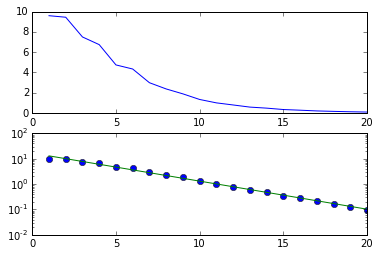

In [24]:
subplot(211)
plot(d['number'], d['amplitude'])
subplot(212)
semilogy(d['number'], d['amplitude'], 'o')
semilogy(d['number'], exp(X.dot(A)))

### Excercise 4

In [25]:
aa = loadtxt('anomalie.txt')

In [26]:
nx = len( unique(aa[:,0])); nx

21

In [27]:
ny = len( unique(aa[:,1])); ny

11

In [30]:
X=aa[:,0].reshape((nx, ny)); 

In [31]:
Y=aa[:,1].reshape((nx, ny)); 

In [33]:
data = aa[:,2].reshape((nx, ny));

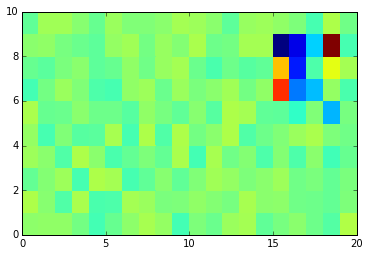

In [34]:
pcolor( X, Y, data)

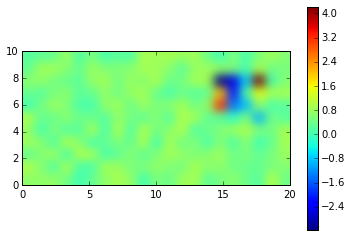

In [35]:
imshow(data.T,  
           extent=[X.min(), X.max(), Y.min(), Y.max()],
           interpolation='gaussian', origin='lower')
colorbar()

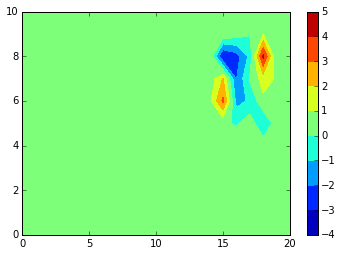

In [36]:
contourf( X, Y, data)
colorbar()

In [37]:
from scipy.ndimage import zoom

In [38]:
data = array(zoom(data,3)).T

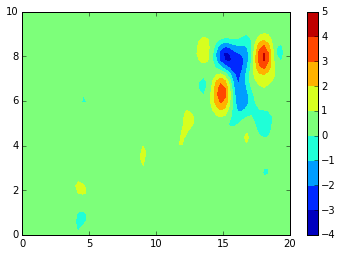

In [39]:
contourf(data, extent=[X.min(), X.max(), Y.min(), Y.max()])
colorbar()
#axis("equal")

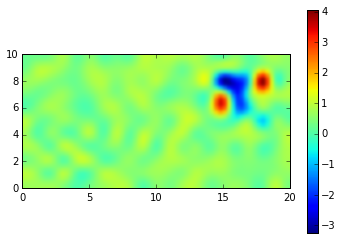

In [40]:
imshow(data,  
           extent=[X.min(), X.max(), Y.min(), Y.max()],
           interpolation='gaussian', origin='lower', aspect=1)
colorbar()